<h2 style="text-align: center;"><strong>Partial Derivatives and Integrals</strong></h2>

**_Calculus II: Partial Derivatives and Integrals_** extends single-variable calculus into the multivariate world, where functions depend on several variables and change across higher-dimensional spaces. These ideas power the **gradients** at the heart of modern machine learning algorithms — especially **stochastic gradient descent (SGD)** and **backpropagation**.

You’ll also explore **integral calculus**, which plays a key role in ML tasks like computing areas under curves, including the widely used **ROC AUC** metric for evaluating classification models.

### **What You’ll Learn**

Through an engaging mix of intuition, theory, and **hands-on practice**, you’ll deepen your understanding of:

- **Partial derivatives** and how they extend differentiation to multivariable functions  
- **Gradients** as vectors of partial derivatives that drive optimization in ML  
- **The multivariable chain rule**, essential for understanding and implementing backpropagation  
- **Integral calculus**, including computing areas under curves and applying integrals in ML evaluation tasks such as ROC AUC  

These ideas provide critical mathematical foundations for later topics in the series, including **Probability & Information Theory** and **Optimization**.

### **Learning Outcomes**

By the end of this topic, you will be able to:

- Understand the mechanics behind **gradient-based learning**, including how partial derivatives shape the updates in training deep neural networks.  
- Comfortably read and interpret multivariate calculus expressions that appear in ML and related fields such as optimization and information theory.  
- Apply **integral calculus** to compute areas under curves and interpret metrics like **ROC AUC** used to assess model performance.

---

<h2 style="text-align: center;"><strong>Segment 1: Machine Learning Gradients</strong></h2>

* Partial Derivatives of Multivariate Functions
* The Partial-Derivative Chain Rule
* Quadratic Cost
* Gradient Descent 
* Higher-Order Partial Derivatives

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

## **Partial Derivatives of Multivariate Functions**

> Definition of the Function $f(x, y) = x^2 - y^2$

In [2]:
def f(x, y):
    return x**2 - y**2

**Plot $z$ with respect to $x$ by varying $x$**

In [3]:
xs = np.linspace(-3, 3, 1000)

*While holding $y$ constant (e.g., at $y = 0$)*

In [4]:
zs_wrt_x = f(xs, 0)

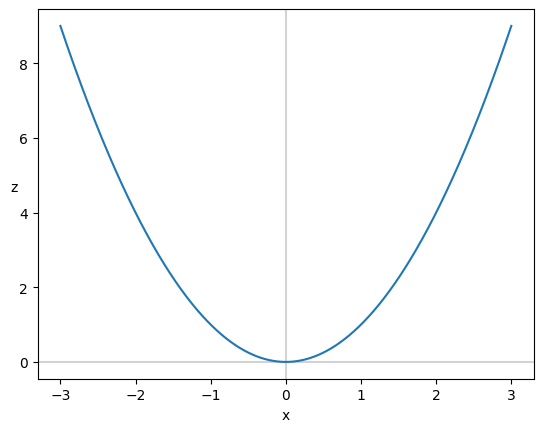

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
ax.plot(xs, zs_wrt_x)
plt.show()

*To determine the slope of $z$ with respect to $x$ at a given point along the curve, we use the partial derivative* $\frac{\partial z}{\partial x}$.

<div align="center">

Given $z = x^2 - y^2$,  
$\frac{\partial z}{\partial x} = 2x$.

</div>

In [6]:
def delz_delx(x, y):
    return 2*x

In [7]:
x_samples = [-2, -1, 0, 1, 2]

In [8]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

**Plotting Points and Tangent Lines Along the Curve $z = x^2 - y^2$**

In [9]:
def point_and_tangent_wrt_x(xs, x, y, f, delz_delx, colors):

    z = f(x, y)
    plt.scatter(x, z, c=colors, zorder=3) 
    
    # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_m = delz_delx(x, y)

    # Line is z=mx+b, so b=z-mx
    tangent_b = z - tangent_m*x
    tangent_line = tangent_m*xs + tangent_b
    
    plt.plot(xs, tangent_line, c=colors, linestyle='dashed', linewidth=0.7, zorder=3)

**Plot of the Curve $z = x^2 - y^2$ and Tangent Lines with Respect to $x$**

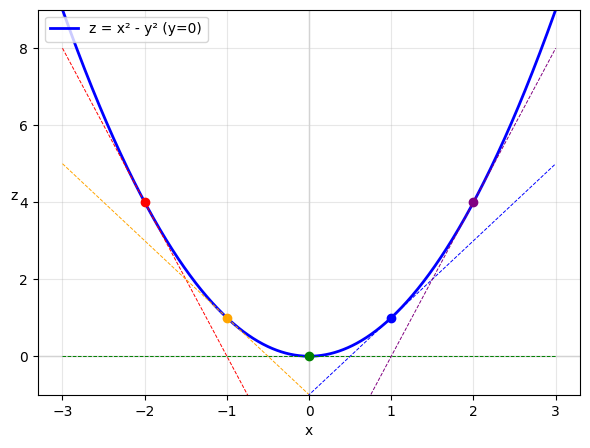

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

# Light reference axes
ax.axvline(x=0, color='lightgray', linewidth=1)
ax.axhline(y=0, color='lightgray', linewidth=1)

# Plot tangent lines at sampled x-values
for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

# Plot the original curve z(x, y=0)
ax.plot(xs, zs_wrt_x, linewidth=2, color='blue', label='z = x² - y² (y=0)')

# Axis labeling
ax.set_xlabel('x')
ax.set_ylabel('z', rotation=0)

# Display limits
ax.set_ylim(-1, 9)

# Grid and legend
ax.grid(alpha=0.3)
ax.legend(loc='upper left')

plt.show()


> This shows that $\frac{\partial z}{\partial x} = 2x$, so the slope along $x$ is *twice* $x$.

**Plot $z$ with respect to $y$ by varying $y$**

In [11]:
ys = np.linspace(-3, 3, 1000)

*While holding $x$ constant (e.g., at $x$ = 2)*

In [12]:
zs_wrt_y = f(2, ys)

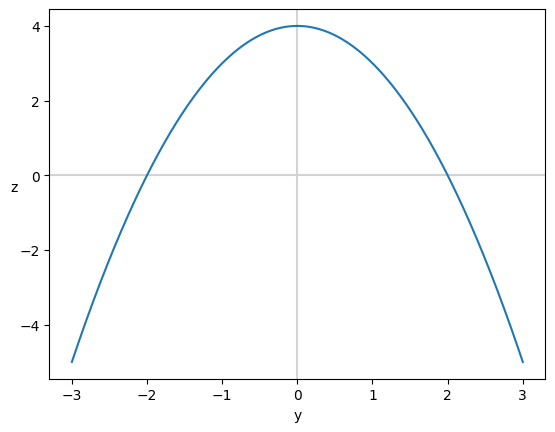

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
ax.plot(ys, zs_wrt_y)
plt.show()

*To determine the slope of $z$ with respect to $y$ at a given point along the curve, we use the partial derivative* $\frac{\partial z}{\partial y}$.

<div align="center">

Given $z = x^2 - y^2$,  
$\frac{\partial z}{\partial y} = -2x$.

</div>

In [14]:
def delz_dely(x, y):
    return -2*y

In [15]:
y_samples = [-2, -1, 0, 1, 2]

**Plotting Points and Tangent Lines Along the Curve $z = x^2 - y^2$**

In [16]:
def point_and_tangent_wrt_y(ys, x, y, f, delz_dely, colors):

    z = f(x, y)
    plt.scatter(y, z, c=colors, zorder=3) 
    
    # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_m = delz_dely(x, y)

    # Line is z=mx+b, so b=z-mx
    tangent_b = z - tangent_m*y
    tangent_line = tangent_m*ys + tangent_b
    
    plt.plot(ys, tangent_line, c=colors, linestyle='dashed', linewidth=0.7, zorder=3)

**Plot of the Curve $z = x^2 - y^2$ and Tangent Lines with Respect to $y$**

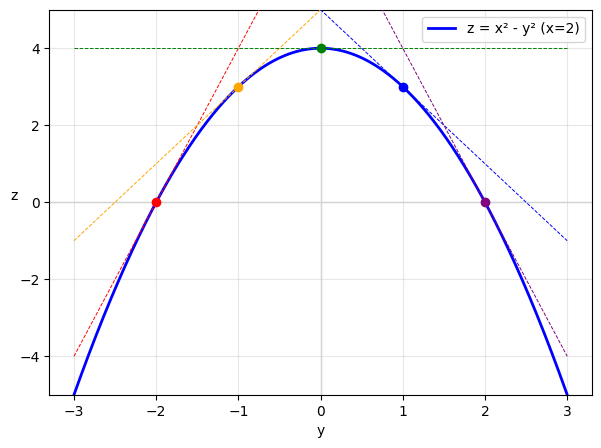

In [17]:
fig, ax = plt.subplots(figsize=(7, 5))

# Light reference axes
ax.axvline(x=0, color='lightgray', linewidth=1)
ax.axhline(y=0, color='lightgray', linewidth=1)

# Plot tangent lines at sampled y-values
for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])  # x fixed at 2

# Plot the original curve z(x=2, y)
ax.plot(ys, zs_wrt_y, linewidth=2, color='blue', label='z = x² - y² (x=2)')

# Axis labeling
ax.set_xlabel('y')
ax.set_ylabel('z', rotation=0)

# Display limits
ax.set_ylim(-5, 5)

# Grid and legend
ax.grid(alpha=0.3)
ax.legend(loc='upper right')

plt.show()

> This visually demonstrates that $\frac{\partial z}{\partial y} = -2y$.  
> That is, the slope of $z$ along the $y$-axis is *twice* the $y$ value *and inverted*, resulting in the parabolic curve opening downward.

---

*While computing partial derivatives by hand helps understand calculus, automatic differentiation makes it easier for functions with many variables. For example, we can use PyTorch to compute the slopes of $z$ with respect to $x$ and $y$ at any point $(x, y, z)$:*

In [18]:
x = torch.tensor(0., requires_grad=True)
x

tensor(0., requires_grad=True)

In [19]:
y = torch.tensor(0., requires_grad=True)
y

tensor(0., requires_grad=True)

*Forward pass*

In [20]:
z = f(x, y)
z

tensor(0., grad_fn=<SubBackward0>)

*Autodiff*

In [21]:
z.backward() 

In [22]:
x.grad

tensor(0.)

In [23]:
y.grad

tensor(-0.)

### **Partial Derivatives of a Cylinder's Volume**

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [24]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

*Let's say the radius is 3 meters*

In [25]:

r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

*Assuming the length is 5 meters*

In [26]:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

*Volume of the cylinder is **141.4** cubic meters*

In [27]:
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

*Autodiff*

In [28]:
v.backward()

**As the derivative of $v$ with respect to $l$:**
$$\frac{\partial v}{\partial l} = \pi r^2$$

In [29]:
l.grad

tensor(28.2743)

*Calculating $\pi r^2$ for $r = 3$*

In [30]:
math.pi * 3**2

28.274333882308138

> This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of approximately $28.27~\text{m}^3$. We can verify this ourselves:

In [31]:
cylinder_vol(3, 6)

169.64600329384882

In [32]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [33]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

**The partial derivative of $v$ with respect to $r$ is:**
$$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [34]:
r.grad

tensor(94.2478)

*Calculating $2 \pi r l$ for $r = 3$ and $l = 5$*

In [35]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ appears in the partial derivative, so changing it affects the scale of its impact on $v$. As usual in calculus, the derivative is defined for an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer the approximation to the true $\frac{\partial v}{\partial r}$. For example, at $\Delta r = 1 \times 10^{-6}$:

In [36]:
delta = 1e-6

*Approximating $\frac{\partial v}{\partial r}$ Using a Small $\Delta r$*

In [37]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta

94.24779531741478

---

## **The Partial-Derivative Chain Rule**

The **partial-derivative chain rule** helps us compute how a function changes with respect to a variable that indirectly affects it through other variables. In machine learning, this is crucial for computing gradients of a loss function with respect to model parameters.

Suppose we have a loss function $L$ that depends on a prediction $y_\text{pred}$, which in turn depends on a model parameter $w$:

$$
L = f(y_\text{pred}), \quad y_\text{pred} = g(w)
$$

The derivative of $L$ with respect to $w$ is:

$$
\frac{dL}{dw} = \frac{\partial L}{\partial y_\text{pred}} \frac{dy_\text{pred}}{dw}
$$

Here:
- $\frac{\partial L}{\partial y_\text{pred}}$ measures how the loss changes with the prediction.
- $\frac{dy_\text{pred}}{dw}$ measures how the prediction changes with the parameter.

**Example:**  
Consider a simple linear model: $y_\text{pred} = w x$, with a squared error loss:

$$
L = (y_\text{pred} - y_\text{true})^2
$$

Applying the chain rule:

$$
\begin{align*}
\frac{dL}{dw} &= \frac{\partial L}{\partial y_\text{pred}} \frac{dy_\text{pred}}{dw} \\
&= 2 (y_\text{pred} - y_\text{true}) \cdot x \\
&= 2 (w x - y_\text{true}) x
\end{align*}
$$

> This shows how the chain rule lets us propagate gradients from the loss back to the model parameters, which is the foundation of **backpropagation** in neural networks.

---

## **Quadratic Cost**

The **quadratic cost** (or mean squared error) measures the squared difference between predicted and true values:

$$
J = \frac{1}{2} \sum_{i=1}^{n} (y_\text{pred}^{(i)} - y_\text{true}^{(i)})^2
$$

> It is commonly used in regression problems to quantify the error of a model's predictions.

### **Quadratic Cost Function (Mean Squared Error)**

The **quadratic cost function**, or **mean squared error (MSE)**, is widely used in regression problems to quantify the difference between predicted and true values.

For a dataset with $n$ examples:

$$
C = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

Where:  
- $\hat{y}_i = f_\theta(x_i)$ is the predicted value for the $i$-th example,  
- $y_i$ is the true value,  
- $n$ is the number of examples.

##### **Conceptual Interpretation**
- Each term $(\hat{y}_i - y_i)^2$ measures the squared error for a single prediction.  
- Squaring ensures all errors are non-negative and penalizes large deviations more heavily.  
- Dividing by $n$ gives the **average error**, making it independent of dataset size.

### **Gradient of the Cost Function**

The **gradient** of the cost function with respect to all model parameters $\theta = (\theta_1, \theta_2, \dots, \theta_m)$ is a vector:

$$
\nabla_\theta C = 
\begin{bmatrix}
\frac{\partial C}{\partial \theta_1} \\
\frac{\partial C}{\partial \theta_2} \\
\vdots \\
\frac{\partial C}{\partial \theta_m}
\end{bmatrix}
= \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) 
\begin{bmatrix}
\frac{\partial \hat{y}_i}{\partial \theta_1} \\
\frac{\partial \hat{y}_i}{\partial \theta_2} \\
\vdots \\
\frac{\partial \hat{y}_i}{\partial \theta_m}
\end{bmatrix}
$$

- Each component $\frac{\partial C}{\partial \theta_j}$ tells us **how sensitive the cost is to parameter $\theta_j$**.  
- Collecting all components as a vector $\nabla_\theta C$ allows us to **update all parameters simultaneously** in the direction of steepest descent:

$$
\theta \gets \theta - \eta \, \nabla_\theta C
$$

where $\eta$ is the learning rate.

##### **Key Concepts**

1. **Gradient Vector ($\nabla_\theta C$):** Points in the direction of steepest increase of the cost. Its negative points towards the direction of fastest decrease.  
2. **Parameter Update:** Using $\nabla_\theta C$ in gradient descent, we iteratively reduce the cost.  
3. **Per-example Contribution:** Each training example contributes to the gradient, summed (or averaged) across the batch.  
4. **Scaling:** The division by $n$ ensures the gradient is **independent of batch size**.  
5. **Intuition:** If a parameter contributes to a large positive error, its gradient component is positive and will be decreased; if it contributes to a negative error, its component is negative and will be increased.

---

## **Gradient Descent**

**Gradient Descent** is an optimization algorithm used to minimize a cost function by iteratively adjusting model parameters in the direction of steepest descent (opposite to the gradient).

##### **Conceptual Interpretation**
- The gradient $\nabla_\theta C$ points in the direction of **steepest increase** of the cost function $C(\theta)$.  
- To minimize $C$, we move in the **opposite direction**:

$$
\theta \gets \theta - \eta \, \nabla_\theta C
$$

where:  
- $\theta = (\theta_1, \theta_2, \dots, \theta_m)$ is the vector of model parameters,  
- $\eta$ is the **learning rate**, controlling the step size.

- Repeating this update iteratively gradually moves $\theta$ towards a (local) minimum of $C$.

##### **1D Example**
Suppose $C(\theta) = (\theta - 3)^2$:

- Gradient: $\frac{dC}{d\theta} = 2(\theta - 3)$  
- Update rule: $\theta \gets \theta - \eta \cdot 2(\theta - 3)$  

Starting from $\theta = 0$ and $\eta = 0.1$:

| Step | $\theta$ | $C(\theta)$ |
|------|-----------|-------------|
| 0    | 0         | 9           |
| 1    | 0.6       | 5.76        |
| 2    | 1.08      | 3.686       |
| ...  | ...       | ...         |

After several steps, $\theta$ converges to 3, the minimum.

##### **Key Concepts**

1. **Learning Rate ($\eta$):** Too small → slow convergence; too large → may overshoot the minimum.  
2. **Batch vs Stochastic Gradient Descent:**  
   - **Batch:** Uses all training examples per update.  
   - **Stochastic (SGD):** Updates using one or a few examples, faster but noisier.  
3. **Gradient Direction:** The negative gradient points towards the fastest decrease of the cost.  
4. **Iterative Updates:** Gradient descent iteratively reduces the cost until convergence.

---

## **Higher-Order Partial Derivatives**

Higher-order partial derivatives measure the rate of change of a partial derivative itself. They extend the concept of first-order partial derivatives to understand **how the slope of a function changes** in multiple directions.

##### **Definition**

For a function $f(x, y)$, the **second-order partial derivatives** are:

$$
\frac{\partial^2 f}{\partial x^2}, \quad 
\frac{\partial^2 f}{\partial y^2}, \quad
\frac{\partial^2 f}{\partial x \partial y}, \quad
\frac{\partial^2 f}{\partial y \partial x}
$$

Where:  
- $\frac{\partial^2 f}{\partial x^2}$ and $\frac{\partial^2 f}{\partial y^2}$ are **pure second-order derivatives**, measuring curvature along a single variable.  
- $\frac{\partial^2 f}{\partial x \partial y}$ and $\frac{\partial^2 f}{\partial y \partial x}$ are **mixed partial derivatives**, measuring how the slope in one direction changes with respect to the other variable.

##### **Example**

Let $f(x, y) = x^2 y + 3xy^2$. Then:

$$
\frac{\partial f}{\partial x} = 2xy + 3y^2, \quad
\frac{\partial f}{\partial y} = x^2 + 6xy
$$

Second-order derivatives:

$$
\frac{\partial^2 f}{\partial x^2} = 2y, \quad
\frac{\partial^2 f}{\partial y^2} = 6x, \quad
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x} = 2x + 6y
$$

##### **Key Concepts**

1. **Curvature:** Second-order derivatives describe how the slope changes, indicating curvature of the function surface.  
2. **Symmetry (Clairaut’s Theorem):** For most smooth functions, mixed partial derivatives are equal:

$$
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial y \partial x}
$$

3. **Applications in ML:** Higher-order derivatives are used in **Hessian matrices** for optimization, Newton’s method, and understanding loss surface curvature.

---